# Práctica: Análisis Factorial

> Requiere cargar el archivo ["smoke.sav"](https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/AFE/smoke.sav) en el repositorio local. 

Eres un asistente de investigación de un grupo de Psicología de la Salud. En esta etapa preliminar, se te ha asignado evaluar la estructura factorial de una escala elaborada por tu grupo de investigación. 

In [4]:
!pip install factor_analyzer
!pip install pyreadstat
!wget https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/AFE/smoke.sav

--2024-01-22 15:59:59--  https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/AFE/smoke.sav
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/renatoparedes/EstadisticaYPsicologiaMatematica/main/AFE/smoke.sav [following]
--2024-01-22 16:00:00--  https://raw.githubusercontent.com/renatoparedes/EstadisticaYPsicologiaMatematica/main/AFE/smoke.sav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5809 (5.7K) [application/octet-stream]
Saving to: ‘smoke.sav’

smoke.sav           100%[===================>]   5.67K  --.-KB/s    in 0s      

2024-01-22 16:00:00 (58.1 MB/s) - ‘smoke.sav’

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_spss("smoke.sav")
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns.values)
scaled_df.dropna(inplace=True)
scaled_df

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,...,s16,s17,s18,s19,s20,s21,s22,s23,s24,s25
0,1.144538,0.845311,-0.623663,1.159459,-1.761410,-1.426881,-0.412549,0.853798,1.223217,-0.559233,...,-0.877338,-0.980196,-0.763370,-0.875545,1.134563,0.561337,-0.025206,-0.608895,-0.366505,0.950168
1,1.144538,0.845311,0.918171,1.159459,0.640513,1.683207,2.090248,0.853798,1.223217,1.304877,...,0.507933,0.070014,0.508913,0.051503,0.360997,0.561337,1.109048,1.248751,1.388859,0.076781
2,1.144538,0.845311,0.918171,0.025206,-0.160128,0.128163,1.255982,0.853798,0.295611,1.304877,...,1.893204,1.120224,1.781197,0.978550,0.360997,1.432377,1.109048,0.319928,1.388859,0.076781
3,-0.244168,-0.104359,-0.623663,0.025206,0.640513,-0.649359,-0.412549,-0.305838,0.295611,1.304877,...,0.507933,0.070014,0.508913,0.978550,-1.186134,0.561337,-0.025206,0.319928,-0.366505,-0.796605
4,-0.244168,0.845311,-0.623663,1.159459,-0.960769,0.905685,0.421717,-0.305838,-0.631995,-0.559233,...,-0.877338,-0.980196,0.508913,-0.875545,1.134563,0.561337,-0.025206,-0.608895,-0.366505,-0.796605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,-0.244168,-0.104359,0.918171,-2.243301,-0.960769,-0.649359,-0.412549,-0.305838,0.295611,-0.559233,...,0.507933,0.070014,0.508913,0.051503,-1.186134,-1.180743,-2.293713,0.319928,-0.366505,-0.796605
87,1.144538,-2.003699,-1.394580,0.025206,0.640513,-1.426881,-0.412549,0.853798,-2.487208,0.372822,...,-0.877338,0.070014,-0.763370,1.905597,-1.186134,0.561337,1.109048,-0.608895,0.511177,-0.796605
88,1.144538,0.845311,0.147254,1.159459,0.640513,0.905685,0.421717,-0.305838,1.223217,2.236931,...,-0.877338,0.070014,0.508913,-0.875545,1.134563,1.432377,1.109048,-0.608895,-0.366505,0.950168
89,1.144538,-0.104359,-1.394580,0.025206,-0.960769,0.128163,-1.246815,-0.305838,0.295611,-0.559233,...,-0.877338,-0.980196,-0.763370,-0.875545,0.360997,1.432377,1.109048,-0.608895,-1.244186,0.076781


## Parte 1: Supuestos de un AF

Evalúa la adecuación de los datos para un análisis factorial empleando las prueba de Bartlett y el índice KMO. ¿Qué puedes concluir?
> Sugerencia: Utiliza las funciones `calculate_bartlett_sphericity` y `calculate_kmo` disponibles en el paquete `factor_analyzer`. 

In [2]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

# Escribe tu respuesta aquí
statistic, p_value = calculate_bartlett_sphericity(scaled_df)
print("Chi-squared: ", statistic)
print("p-value: ", p_value)

Chi-squared:  876.290240838983
p-value:  8.241484616662238e-58


In [5]:
from factor_analyzer.factor_analyzer import calculate_kmo

# Escribe tu respuesta aquí
kmo_per_variable, kmo_total = calculate_kmo(scaled_df)

print("General KMO: ", kmo_total)
df_kmo_per_variable = pd.DataFrame(
    kmo_per_variable,
    index=scaled_df.columns.values,
    columns=["Individual KMO"],
)


def classify(kmo):
    if kmo < 0.4:
        return "Problematic"
    elif kmo < 0.5:
        return "Potential"
    else:
        return "Acceptable"


df_kmo_per_variable["Classification"] = df_kmo_per_variable[
    "Individual KMO"
].apply(classify)
df_kmo_per_variable

General KMO:  0.6872026282240941


,Individual KMO,Classification
s1,0.576600,Acceptable
s2,0.631304,Acceptable
s3,0.688213,Acceptable
s4,0.588630,Acceptable
s5,0.644924,Acceptable
s6,0.618284,Acceptable
s7,0.858984,Acceptable
s8,0.589922,Acceptable
s9,0.566263,Acceptable
s10,0.686213,Acceptable


Los resultados de la prueba KMO sugieren niveles adecuados de MSA a nivel global. Sin embargo, a nivel individual se identifica a las variable `s21` y `s25` con un nivel de MSA inadecuado. Debido a ello, optamos por eliminarlas de nuestra matriz de datos:

In [6]:
scaled_df = scaled_df.drop(["s21", "s25"], axis=1)
scaled_df

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,...,s14,s15,s16,s17,s18,s19,s20,s22,s23,s24
0,1.144538,0.845311,-0.623663,1.159459,-1.761410,-1.426881,-0.412549,0.853798,1.223217,-0.559233,...,-0.972866,-1.340197,-0.877338,-0.980196,-0.763370,-0.875545,1.134563,-0.025206,-0.608895,-0.366505
1,1.144538,0.845311,0.918171,1.159459,0.640513,1.683207,2.090248,0.853798,1.223217,1.304877,...,0.010931,1.020279,0.507933,0.070014,0.508913,0.051503,0.360997,1.109048,1.248751,1.388859
2,1.144538,0.845311,0.918171,0.025206,-0.160128,0.128163,1.255982,0.853798,0.295611,1.304877,...,0.994729,1.020279,1.893204,1.120224,1.781197,0.978550,0.360997,1.109048,0.319928,1.388859
3,-0.244168,-0.104359,-0.623663,0.025206,0.640513,-0.649359,-0.412549,-0.305838,0.295611,1.304877,...,1.978526,-0.553372,0.507933,0.070014,0.508913,0.978550,-1.186134,-0.025206,0.319928,-0.366505
4,-0.244168,0.845311,-0.623663,1.159459,-0.960769,0.905685,0.421717,-0.305838,-0.631995,-0.559233,...,-0.972866,-0.553372,-0.877338,-0.980196,0.508913,-0.875545,1.134563,-0.025206,-0.608895,-0.366505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,-0.244168,-0.104359,0.918171,-2.243301,-0.960769,-0.649359,-0.412549,-0.305838,0.295611,-0.559233,...,0.010931,-0.553372,0.507933,0.070014,0.508913,0.051503,-1.186134,-2.293713,0.319928,-0.366505
87,1.144538,-2.003699,-1.394580,0.025206,0.640513,-1.426881,-0.412549,0.853798,-2.487208,0.372822,...,0.010931,1.807104,-0.877338,0.070014,-0.763370,1.905597,-1.186134,1.109048,-0.608895,0.511177
88,1.144538,0.845311,0.147254,1.159459,0.640513,0.905685,0.421717,-0.305838,1.223217,2.236931,...,1.978526,1.020279,-0.877338,0.070014,0.508913,-0.875545,1.134563,1.109048,-0.608895,-0.366505
89,1.144538,-0.104359,-1.394580,0.025206,-0.960769,0.128163,-1.246815,-0.305838,0.295611,-0.559233,...,-0.972866,-1.340197,-0.877338,-0.980196,-0.763370,-0.875545,0.360997,1.109048,-0.608895,-1.244186


## Parte 2: Número de factores a extraer

Utiliza el criterio de varianza explicada y el análisis paralelo de Horn para determinar el número de factores a extraer. ¿Qué puedes concluir?
> Sugerencia: Utiliza el método `get_factor_variance` de la función `FactorAnalyzer` disponible en el paquete `factor_analyzer`, y el método `parallel` de la función `fa` disponible en el paquete `Psych` del lenguaje de programación `R`.

In [10]:
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(n_factors=scaled_df.shape[1], rotation=None)
fa.fit(scaled_df)

# Escribe tu respuesta aquí

variance, proportional_variance, cumulative_variance = fa.get_factor_variance()

df_var = pd.DataFrame(
    [variance, proportional_variance, cumulative_variance],
    index=["SS Loadings", "Proportional variance", "Cumulative variance"],
)
df_var.columns += 1
df_var = df_var.add_prefix("F")
df_var

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23
SS Loadings,5.153687,2.660599,2.141114,1.455908,1.192712,1.112376,0.870924,0.602569,0.523920,0.462315,...,0.297392,0.223633,0.208602,0.114062,0.101101,0.059823,0.044154,0.037702,0.018361,0.000000
Proportional variance,0.224073,0.115678,0.093092,0.063300,0.051857,0.048364,0.037866,0.026199,0.022779,0.020101,...,0.012930,0.009723,0.009070,0.004959,0.004396,0.002601,0.001920,0.001639,0.000798,0.000000
Cumulative variance,0.224073,0.339752,0.432843,0.496144,0.548001,0.596365,0.634231,0.660430,0.683209,0.703310,...,0.767245,0.776969,0.786038,0.790998,0.795393,0.797994,0.799914,0.801553,0.802352,0.802352


In [11]:
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages(c("psych","GPArotation"),dependencies=TRUE)

Parallel analysis suggests that the number of factors =  4  and the number of components =  NA 


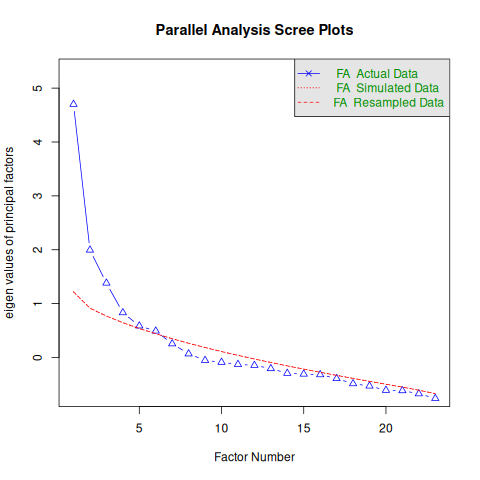

In [12]:
%%R -i scaled_df
library(foreign)
library(psych)

# Escribe tu respuesta aquí
parallel <- fa.parallel(scaled_df, n.iter=1000, fa="fa")

El criterio de varianza explicada sugiere que debemos preservar al menos 6 factores. En contraste, el método de análisis paralelo sugiere retener 4 factores. Podemos optar por retener 4 factores, apostando a contar con una estructura factorial más simple. 

## Parte 3: Extracción y rotación de factores

Extrae el número de factores que determinaste en el paso anterior empleando una rotación "Varimax".
> Sugerencia: Utiliza la función `FactorAnalyzer` disponible en el paquete `factor_analyzer`. 

In [13]:
# Escribe tu respuesta aquí
fa = FactorAnalyzer(n_factors=4, rotation="varimax")
fa.fit(scaled_df)

loadings = pd.DataFrame(fa.loadings_, index=scaled_df.columns)
print("Cargas Factoriales:")
loadings.columns += 1
loadings = loadings.add_prefix("F")
loadings

Cargas Factoriales:


,F1,F2,F3,F4
s1,-0.112693,-0.150560,0.876180,0.080347
s2,0.037928,0.465222,0.191923,-0.041117
s3,0.331726,0.330737,-0.176721,0.117428
s4,-0.147491,0.478326,-0.015342,0.197960
s5,0.188821,0.364363,0.072598,0.535344
s6,0.080207,0.393121,-0.096604,0.698871
s7,0.487498,0.515793,0.192685,0.282594
s8,0.028719,0.259655,0.405550,-0.040404
s9,0.254974,0.131389,0.387863,-0.002873
s10,0.474563,0.250505,0.416027,0.078840


## Parte 4: Interpretación de factores

1. Evalúa la razón de cargas al cuadrado. ¿Qué observas?

In [14]:
def cross_loading_eval(ratio):
    if ratio < 1.5:
        return "Problematic"
    elif ratio < 2:
        return "Potential"
    else:
        return "Ignorable"


# Escribe tu respuesta aquí
squared_loadings = pd.DataFrame(fa.loadings_**2, index=scaled_df.columns)
squared_loadings.columns += 1
squared_loadings = squared_loadings.add_prefix("F")
squared_loadings["Ratio"] = squared_loadings.apply(
    lambda x: x.nlargest(2).values[0] / x.nlargest(2).values[1], axis=1
)
squared_loadings["Classification"] = squared_loadings["Ratio"].apply(
    cross_loading_eval
)
print("Cargas Factoriales al cuadrado:")
squared_loadings

Cargas Factoriales al cuadrado:


,F1,F2,F3,F4,Ratio,Classification
s1,0.012700,0.022668,0.767691,0.006456,33.866202,Ignorable
s2,0.001439,0.216432,0.036834,0.001691,5.875817,Ignorable
s3,0.110042,0.109387,0.031230,0.013789,1.005993,Problematic
s4,0.021754,0.228795,0.000235,0.039188,5.838358,Ignorable
s5,0.035653,0.132760,0.005271,0.286593,2.158727,Ignorable
s6,0.006433,0.154544,0.009332,0.488420,3.160388,Ignorable
s7,0.237654,0.266043,0.037127,0.079860,1.119454,Problematic
s8,0.000825,0.067421,0.164471,0.001632,2.439478,Ignorable
s9,0.065012,0.017263,0.150438,0.000008,2.314010,Ignorable
s10,0.225210,0.062753,0.173078,0.006216,1.301203,Problematic


2. Evalúa las comunalidades. ¿Qué observas?
> Sugerencia: Utiliza el método `get_communalities` de la función `FactorAnalyzer` disponible en el paquete `factor_analyzer`.

In [15]:
# Escribe tu respuesta aquí
communalities = pd.DataFrame(
    fa.get_communalities(),
    index=scaled_df.columns.values,
    columns=["Communalities"],
)
communalities

,Communalities
s1,0.809514
s2,0.256395
s3,0.264449
s4,0.289973
s5,0.460277
s6,0.658730
s7,0.620684
s8,0.234349
s9,0.232721
s10,0.467256


# Análisis Factorial Confirmatorio

Eres parte de un equipo de investigación de psicología forense enfocado en temas de violencia doméstica. Actualmente tu grupo está validando el modelo teórico de una escala sobre estrategias de defensa frente a la corte en casos de mujeres que han asesinado a sus esposos abusivos.

El modelo considera los siguientes constructos e indicadores:

**Provocation**
- Provo: Refleja descontrol ante conducta provocadora del esposo.
- Caused: La provocación fue tal que podría haber descontrolado a cualquiera.
- Passion: Actúo en el calor de la pasión ante la provocación.

**Self defense**
- Protect: Actuó en defensa propia.
- Save: Con su ataque evitó daños corporales de relevancia.
- Defend: Hizo un uso de la fuerza necesario para protegerse.

**Insanity**
- Mental: Refleja un grado de incapacidad mental.
- Insane: Refleja irracionalidad e insanía.
- Stable: Refleja inestabilidad.

Y cuentas con los siguientes datos:

In [ ]:
!pip install semopy

In [16]:
import pandas as pd

df = pd.read_csv(
    "https://raw.githubusercontent.com/renatoparedes/EstadisticaYPsicologiaMatematica/main/SEM/export.csv"
)
df

,sex,age,educ,income,provo,protect,mental,caused,save,insane,passion,defend,stable
0,male,19.0,6.0,1.0,4.0,3.0,4.0,4.0,4.0,4.0,5.0,3.0,4.0
1,female,21.0,6.0,1.0,4.0,3.0,2.0,6.0,1.0,1.0,3.0,1.0,4.0
2,female,36.0,6.0,2.0,7.0,5.0,2.0,5.0,6.0,2.0,3.0,3.0,5.0
3,female,21.0,6.0,1.0,5.0,4.0,3.0,3.0,3.0,3.0,5.0,4.0,3.0
4,female,19.0,6.0,1.0,8.0,5.0,2.0,6.0,5.0,3.0,6.0,6.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,female,18.0,4.0,1.0,7.0,7.0,2.0,7.0,7.0,2.0,6.0,6.0,3.0
393,male,21.0,6.0,1.0,5.0,5.0,5.0,1.0,1.0,7.0,5.0,2.0,7.0
394,female,18.0,6.0,1.0,6.0,6.0,3.0,7.0,7.0,4.0,2.0,4.0,3.0
395,male,20.0,6.0,1.0,8.0,6.0,3.0,6.0,8.0,4.0,8.0,4.0,7.0


1. Define el modelo de acuerdo a la descripción brindada. Genera un gráfico para mostrar los items y constructos definidos.
> Sugerencia: Utiliza el método `semplot` disponible en el paquete `semopy`.

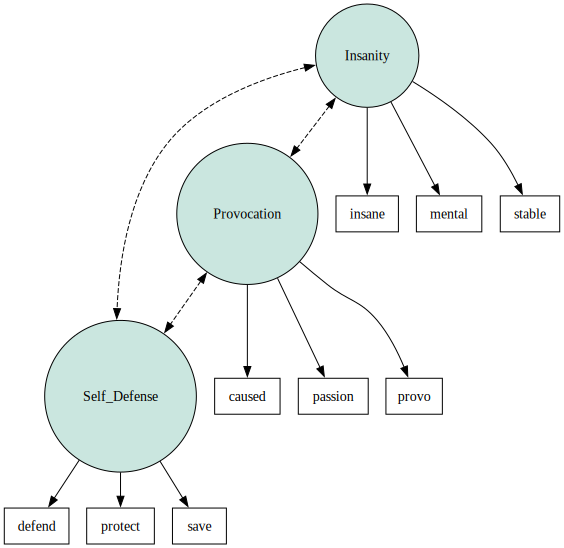

In [17]:
import semopy

# Escribe tu respuesta aquí
measure_desc = """
# Measurement
Provocation =~ provo + caused + passion
Self_Defense =~ protect + save + defend
Insanity =~ mental + insane + stable

"""

g = semopy.semplot(measure_desc, "out.png", plot_covs=True)
g

2. Ajusta el modelo a tus datos y verifica las métricas de bondad de ajuste. ¿Qué puedes concluir en relación al ajuste general del modelo? ¿Notas algún problema de estimación o identificación?

In [18]:
# Escribe tu respuesta aquí
measure_model = semopy.Model(measure_desc)
res = measure_model.fit(df)
stats = semopy.calc_stats(measure_model)
print(stats.T)

                    Value
DoF             24.000000
DoF Baseline    36.000000
chi2           133.115014
chi2 p-value     0.000000
chi2 Baseline  941.110709
CFI              0.879446
GFI              0.858555
AGFI             0.787833
NFI              0.858555
TLI              0.819169
RMSEA            0.107149
AIC             41.329395
BIC            124.992057
LogLik           0.335302


En términos generales, el modelo evaluado no presenta un buen ajuste a los datos. Idealmente $X^{2}$ debería ser no significativo, CFI superior a .96 y RMSEA menor a 0.07. Métricas que no se cumplen.   

In [19]:
estimates = measure_model.inspect(std_est=True)
estimates

,lval,op,rval,Estimate,Est. Std,Std. Err,z-value,p-value
0,provo,~,Provocation,1.000000,0.341261,-,-,-
1,caused,~,Provocation,1.801151,0.789753,0.444754,4.049769,0.000051
2,passion,~,Provocation,0.540847,0.178061,0.20319,2.661782,0.007773
3,protect,~,Self_Defense,1.000000,0.731005,-,-,-
4,save,~,Self_Defense,1.211212,0.919118,0.081514,14.859008,0.0
5,defend,~,Self_Defense,0.996392,0.712008,0.073593,13.539251,0.0
6,mental,~,Insanity,1.000000,0.705073,-,-,-
7,insane,~,Insanity,0.901282,0.657931,0.108452,8.310394,0.0
8,stable,~,Insanity,0.874473,0.628483,0.1054,8.296677,0.0
9,Insanity,~~,Insanity,2.034958,1.000000,0.3351,6.072691,0.0


No se observan problemas de estimación ni identificación. Los parámetros estandarizados se encuentran dentro de los valores esperados (entre -1 y 1).

3. Evalúa la validez del modelo de medición específicado. ¿Qué puedes comentar en relación a las cargas factoriales? ¿Y en relación a los residuos?

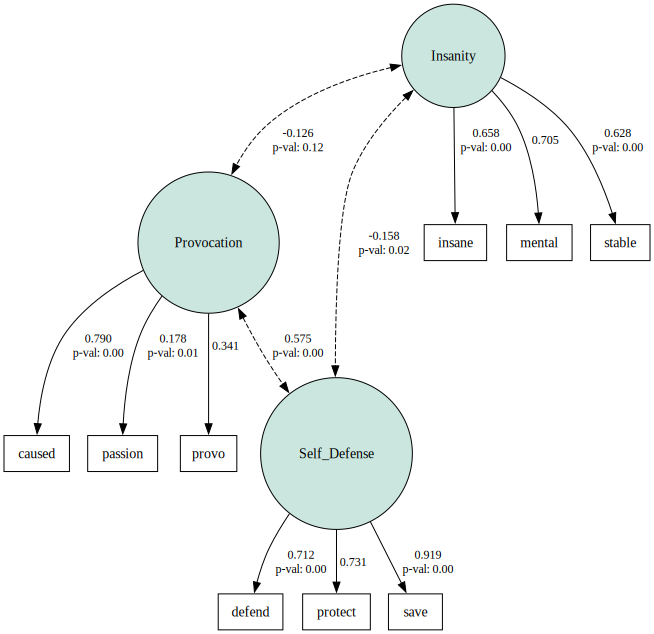

In [20]:
# Escribe tu respuesta aquí
g = semopy.semplot(measure_model, "out.png", std_ests=True, plot_covs=True)
g

Podemos apreciar cargas factoriales menores a 5 en las variables provo, passion e insane. Esto las convierte en candidatas a ser eliminadas.

In [21]:
import numpy as np

cov_estimate, _ = measure_model.calc_sigma()
cov = measure_model.mx_cov
residual = cov - cov_estimate
std_residual = residual / np.std(residual)

std_res = pd.DataFrame(
    std_residual,
    columns=measure_model.names_lambda[0],
    index=measure_model.names_lambda[0],
)
std_res

,caused,defend,insane,mental,passion,protect,provo,save,stable
caused,-0.000242,-0.954829,0.136847,-0.347276,-0.458778,0.176962,0.016409,0.249062,-1.095681
defend,-0.954829,0.000608,-0.523497,0.928848,0.755063,0.424149,-0.707864,0.009202,0.139927
insane,0.136847,-0.523497,0.000200,0.040206,1.391351,-1.190971,3.095657,-1.386947,-0.179399
mental,-0.347276,0.928848,0.040206,0.009859,0.631669,1.878869,2.333247,0.895259,0.125900
passion,-0.458778,0.755063,1.391351,0.631669,0.001530,-0.727680,2.886819,0.313214,0.899447
protect,0.176962,0.424149,-1.190971,1.878869,-0.727680,0.002091,0.505366,-0.103964,0.767191
provo,0.016409,-0.707864,3.095657,2.333247,2.886819,0.505366,-0.002585,-0.629990,1.649589
save,0.249062,0.009202,-1.386947,0.895259,0.313214,-0.103964,-0.629990,0.001550,-0.273484
stable,-1.095681,0.139927,-0.179399,0.125900,0.899447,0.767191,1.649589,-0.273484,0.000552


Los residuos estandarizados sugieren que las covariaciones `provo-passion` y `provo-insane` se encuentran fuera de los rangos aceptables (< 2.5). Se trata de las variables que precisamente no presentan cargas factoriales adecuadas.

4. Evalúa la validez de constructo del modelo propuesto. ¿Qué puedes concluir?
> Sugerencia: Considera las medidas AVE y CR.

In [22]:
# Escribe tu respuesta aquí

# Get loadings and constructs
estimates = measure_model.inspect(std_est=True)
loadings = estimates[estimates["op"] == "~"]
constructs = loadings["rval"].unique().tolist()

# AVE computation
print("AVE")
for cons in constructs:
    squared_loadings = loadings[loadings["rval"] == cons]["Est. Std"] ** 2
    ave = squared_loadings.sum() / squared_loadings.size
    print(cons, ":", ave)

AVE
Provocation : 0.2572914455733793
Self_Defense : 0.6287005682116598
Insanity : 0.4416638377673359


Podemos apreciar que solo el factor `Self_Defense` tiene una validez convergente adecuada de acuerdo al indicador AVE.

In [23]:
# Escribe tu respuesta aquí
cors = estimates.query(f'op == "~~" & rval == {constructs} & rval != lval')
cors.insert(5, "r^2", cors["Est. Std"] ** 2)
cors

,lval,op,rval,Estimate,Est. Std,r^2,Std. Err,z-value,p-value
11,Provocation,~~,Insanity,-0.124957,-0.126226,0.015933,0.079472,-1.572352,0.115869
13,Self_Defense,~~,Insanity,-0.331861,-0.157661,0.024857,0.13745,-2.414407,0.015761
14,Self_Defense,~~,Provocation,0.589169,0.575373,0.331054,0.156149,3.773121,0.000161


Podemos apreciar que `Provocation` presenta problemas de validez discriminante, debido a que su valor de AVE es menor al cuadrado de las correlación entre dicho constructo y `Self_Defense`.

In [24]:
# Get loadings and constructs
estimates = measure_model.inspect(std_est=True)
loadings = estimates[estimates["op"] == "~"]
lambdas = pd.DataFrame(
    measure_model.mx_lambda,
    columns=measure_model.names_lambda[1],
    index=measure_model.names_lambda[0],
)
constructs = loadings["rval"].unique().tolist()

# CR computation
print("CR")
for cons in constructs:
    loads = loadings[loadings["rval"] == cons]["Est. Std"]
    idx = np.array(lambdas[cons].to_numpy().nonzero()[0])
    vars = np.array(measure_model.names_lambda[0])[idx].tolist()
    errors = estimates.query(f' op == "~~" & lval == rval & rval == {vars} ')[
        "Est. Std"
    ]
    cr = loads.sum() ** 2 / (loads.sum() ** 2 + errors.sum() ** 2)
    print(cons, ":", cr)

CR
Provocation : 0.25660669844396566
Self_Defense : 0.8180805554782397
Insanity : 0.5856779183112469


Podemos apreciar que solo `Self_Defense` presenta niveles adecuados de confiabilidad de constructo, lo cual sugiere que `Provocation` y `Insanity` no cuentan con evidencia de validez convergente. Se confirma lo apreciado con el indicador AVE.

En general, podemos concluir que el modelo de medición propuesto no puede ser confirmado a partir de la muestra disponbile. Se observan problemas en general con los constructos `Provocation` e `Insanity`, debido a los items `provo`, `passion` e `insane`. Se recomienda revisar o reformular dichos constructos e items para posteriormente ser validados con una nueva muestra.